In [1]:
from tensorflow.keras import backend as K
K.clear_session()

In [2]:
!pip install rarfile

In [3]:
import os
import pandas as pd
import gdown
import rarfile
import shutil
from PIL import Image
# Download the RAR file
url = 'https://drive.google.com/uc?id=1n5zKP3-I_AAS7WYZigtEIm-t545hVyRZ'
#https://drive.google.com/file/d/1o2UTmJ_wqL3CwO1WV0prOd3p2FA7LsZH/view?usp=drive_link
output_rar = '/content/New_Combined_Dataset_Split1.rar'
gdown.download(url, output_rar, quiet=False)
# Extract the RAR file
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content')


Downloading...
From (original): https://drive.google.com/uc?id=1n5zKP3-I_AAS7WYZigtEIm-t545hVyRZ
From (redirected): https://drive.google.com/uc?id=1n5zKP3-I_AAS7WYZigtEIm-t545hVyRZ&confirm=t&uuid=0fc0184f-f492-4183-a97f-6a407ba9a04b
To: /content/New_Combined_Dataset_Split1.rar
100%|██████████| 84.2M/84.2M [00:02<00:00, 40.2MB/s]


Downloading...
From (original): https://drive.google.com/uc?id=1VVJ_lo2Z85MhIQ395W13opPoHQRQUKMJ
From (redirected): https://drive.google.com/uc?id=1VVJ_lo2Z85MhIQ395W13opPoHQRQUKMJ&confirm=t&uuid=5c71e4b2-803d-483b-aba5-8c45b2ee8967
To: /content/New_Combined_Dataset_Split1.rar
100%|██████████| 38.0M/38.0M [00:01<00:00, 21.7MB/s]


Found 8016 images belonging to 5 classes.
Found 1144 images belonging to 5 classes.
Found 2293 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 274s 676ms/step - accuracy: 0.7601 - loss: 0.6105 - val_accuracy: 0.3733 - val_loss: 5.4913
Epoch 2/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 142s 424ms/step - accuracy: 0.8732 - loss: 0.3455 - val_accuracy: 0.5122 - val_loss: 2.5082
Epoch 3/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 107s 424ms/step - accuracy: 0.8957 - loss: 0.2615 - val_accuracy: 0.5568 - val_loss: 2.0196
Epoch 4/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 106s 423ms/step - accuracy: 0.9181 - loss: 0.2099 - val_accuracy: 0.6914 - val_loss: 0.8501
Epoch 5/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 106s 424ms/step - accuracy: 0.9305 - loss: 0.1799 - val_accuracy: 0.8724 - val_loss: 0.5797
Epoch 6/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 142s 425ms/step - accuracy: 0.9398 - loss: 0.1593 - val_accuracy: 0.9003 - val_loss: 0.2771
Epoch 7/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 106s 421ms/step - accuracy: 0.9503 - loss: 0.1223 - val_accuracy: 0.7675 - val_loss: 2.0603
Epoch 8/40
251/251 ━━━━━━━━━━━━━━━━━━━━ 109s 436ms/step - accuracy: 0.9435 -

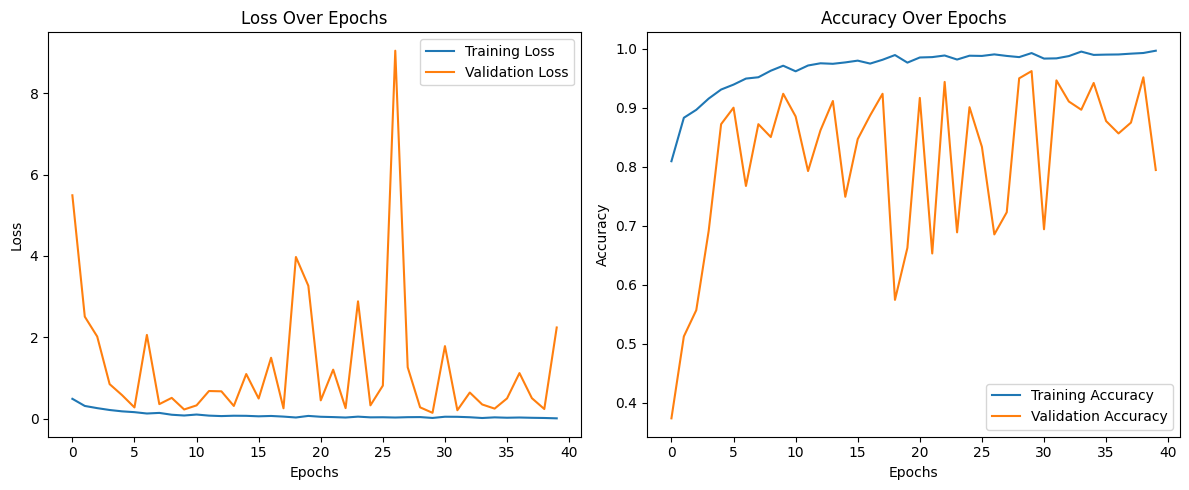

72/72 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step

Performance on Test Data
Precision: 0.8460906206747721
Recall: 0.7762756214566071
F1 Score: 0.7570007063939191
Accuracy: 0.7762756214566071
Confusion Matrix:
                Benign  Malignant  Normal  Pneumonia  Not_pridicted
Benign             61         59       0          0              0
Malignant           0        562       0          0              0
Normal             47        347     288          0             51
Pneumonia           0          2       0         20              1
Not_pridicted       0          0       6          0            849


In [4]:
from tensorflow.keras import backend as K
K.clear_session()
!pip install rarfile
import os
import pandas as pd
import gdown
import rarfile
import shutil
from PIL import Image

# Download the RAR file
url = 'https://drive.google.com/uc?id=1VVJ_lo2Z85MhIQ395W13opPoHQRQUKMJ'
output_rar = '/content/New_Combined_Dataset_Split1.rar'
gdown.download(url, output_rar, quiet=False)

# Extract the RAR file
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content')

# Path to the extracted dataset folder
data_dir = '/content/New_Combined_Dataset_Split1'

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Define the CNN architecture using InceptionV3
inception_model = InceptionV3(weights=None, include_top=False, input_shape=(299, 299, 3))

# Create a custom model for binary classification
model = models.Sequential()
# Add the InceptionV3 base
model.add(inception_model)

# Add global average pooling layer
model.add(layers.GlobalAveragePooling2D())

# Add a dense layer with 1024 units and ReLU activation
model.add(layers.Dense(1024, activation='relu'))

# Add a final output layer with 2 units and softmax activation for multi-class (2-class) classification
model.add(layers.Dense(5, activation='softmax'))  # 2 output neurons for 2 classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ImageDataGenerators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'Train'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'Validate'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'Test'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Training the model
history = model.fit(train_generator, epochs=40, validation_data=val_generator)

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Helper function to evaluate the model on given test generator
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)

    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

    # Display the confusion matrix
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

# Test the model on the test set
evaluate_model(test_generator, model, ['Benign', 'Malignant', 'Normal', 'Pneumonia', 'Not_pridicted'], title="Performance on Test Data")